Support Vector Classification

In [94]:
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd

In [124]:
X,y = make_classification(n_samples=5000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='1', ylabel='0'>

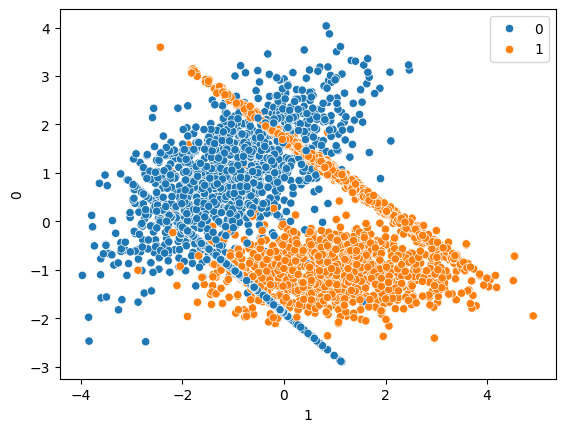

In [125]:
sns.scatterplot(x=pd.DataFrame(X)[1],y=pd.DataFrame(X)[0],hue=y)

In [135]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,stratify=y,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3500, 2), (3500,), (1500, 2), (1500,))

In [136]:
from sklearn.svm import SVC
model=SVC(kernel="rbf")
model.fit(X_train,y_train)

SVC()

In [137]:
y_pred=model.predict(X_test)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
    

[[666  84]
 [ 46 704]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       750
           1       0.89      0.94      0.92       750

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



In [139]:
##GridSearch
model=SVC()
kernel=['rbf','linear','sigmoid','poly']
C_values=[100.0,10.0,1,0.1,0.01]
gamma=[1,0.1,0.01,0.001,0.00001]

params=dict(kernel=kernel,C=C_values,gamma=gamma)
params

{'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
 'C': [100.0, 10.0, 1, 0.1, 0.01],
 'gamma': [1, 0.1, 0.01, 0.001, 1e-05]}

In [140]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,refit=True,cv=5,verbose=True)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [100.0, 10.0, 1, 0.1, 0.01],
                         'gamma': [1, 0.1, 0.01, 0.001, 1e-05],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
             verbose=True)

In [141]:
grid.best_params_

{'C': 100.0, 'gamma': 1, 'kernel': 'rbf'}

In [142]:
y_pred=grid.predict(X_test) 
##Performance Metrics
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))    
print(classification_report(y_test,y_pred))

0.952
[[709  41]
 [ 31 719]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       750
           1       0.95      0.96      0.95       750

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



Support Vector Regression